In [1]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


# PCA RECURSOS HUMANOS

1. Abrir el archivo
2. Separar las variables dependientes de las independientes (RECURSOS HUMANOS) y normalizarlas
3. Construcción de las matrices de varianza y covarianza
4. Cálculo de los valores propios
5. Proyección de los datos

In [2]:
#Se importan las librerias necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

1.Abrir el archivo

In [3]:
#Se cargan los archivos limpios sin variables respetidas, imputados los datos y sin atípicos

#SIEMPRE USAR EL ARCHIVO TOTALULIMPIO2 QUE ES EL DE LOS DATOS LIMPIOS

total=pd.read_excel("TOTALULIMPIO2.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898,11,1810,2008,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900,3525900,343423.189677,79.846659,912761,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904,11,1810,2008,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411,296411,9406.000000,79.846659,122106,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912,11,1810,2008,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496,1594496,3200.000000,46.000000,366562,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913,11,1741,2008,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200,166200,-2000.000000,79.846659,92868,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459,8,1410,2016,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356,1290356,11182.000000,54.000000,790408,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465,8,1410,2016,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414,3679414,343423.189677,8.000000,1476328,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467,8,1410,2016,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225,15550083,503083.000000,400.000000,7454626,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483,8,1410,2016,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882,1284882,343423.189677,18.000000,835716,421689.0,5.155038e+06,1.717450e+05,1180126.0


2.Separar las variables dependientes de las independientes (RECURSOS HUMANOS) y normalizarlas

In [4]:
variables = ['SOCIOS','PERMANENTE','APRENDIZ','PROD_NAL','PROD_EXT','OBRERO','ADM','TOTPERSONAL','TEMPORALDIRECTO','VENTAS']
# Separando los Recursos humanos (Varibles independientes)
X=total.loc[:,variables].values 
# Separando el objetivo que es ventas (Variable dependiente)
y=total.loc [:, ['VENTAS']].values 

In [5]:
x_std= StandardScaler().fit_transform(X)

In [6]:
recursosh = pd.DataFrame(data = X, columns = variables).head(10295)
recursosh

,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,ADM,TOTPERSONAL,TEMPORALDIRECTO,VENTAS
0,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,1.000000,13.0,79.846659,3460300.0
1,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,6.000000,9.0,79.846659,296411.0
2,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,5.000000,36.0,46.000000,1597520.0
3,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,19.714668,5.0,79.846659,231480.0
...,...,...,...,...,...,...,...,...,...,...
10291,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,19.000000,46.0,54.000000,1100444.0
10292,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,17.000000,46.0,8.000000,3300208.0
10293,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,34.000000,303.0,400.000000,15443532.0
10294,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,10.000000,21.0,18.000000,1180126.0


In [7]:
#No hay datos perdidos pues se esta utilizando el archivo de los datos limpios

recursosh.isnull().sum() # Saber si hay casos con NA
recursosh.dropna(how="all", inplace=True) # Eliminar las observaciones con NA
recursosh.columns

Index(['SOCIOS', 'PERMANENTE', 'APRENDIZ', 'PROD_NAL', 'PROD_EXT', 'OBRERO',
       'ADM', 'TOTPERSONAL', 'TEMPORALDIRECTO', 'VENTAS'],
      dtype='object')

In [8]:
x=recursosh.drop("VENTAS",axis = 1) #Se elimina la variable ventas pues X=Recursos Humanos
y=recursosh["VENTAS"]  #Y=Ventas
names=recursosh.columns
X_std= StandardScaler().fit_transform(x)

<Figure size 432x288 with 0 Axes>

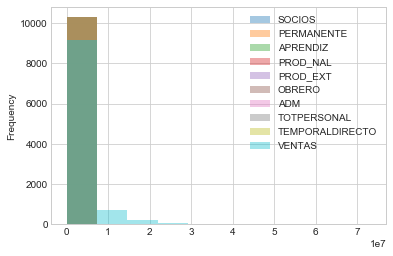

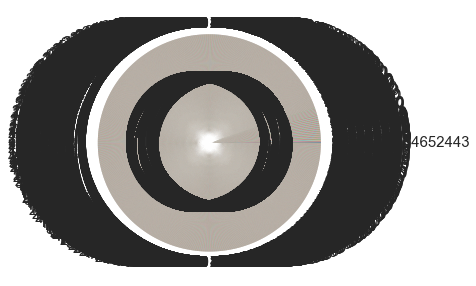

In [9]:
plt.figure("Histograma")
recursosh.plot.hist(alpha=0.4)
plt.figure("Gráfico de pie",figsize=(5,5))
recursosh.VENTAS.value_counts().plot(kind="pie",autopct='%1.1f%%', fontsize=15)
plt.show()

3.Construcción de las matrices de varianza y covarianza 

Para que se pueda realizar el PCA, es necesario que las variables presenten factores comunes. Es decir, que estén muy correlacionadas entre sí. Los coeficientes de la matriz de correlaciones deben ser grandes en valor absoluto. 

In [10]:
# Matriz de covarianza

mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

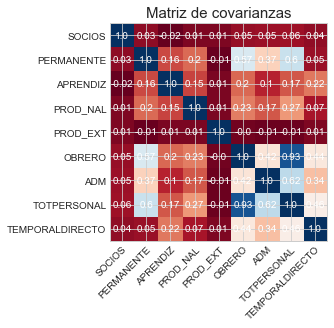

In [40]:
import matplotlib.pyplot as plt
#Gráficar en un mapa de calor las covarianzas

corMat=np.asarray(cov_mat)

fig, ax = plt.subplots()
im = ax.imshow(corMat,cmap="RdBu")

# Mostrar las etiquetas de las variables
ax.set_xticks(np.arange(len(names)-1))
ax.set_yticks(np.arange(len(names)-1))
# Asignar los nombres a las etiquetas
ax.set_xticklabels(names[:9])
ax.set_yticklabels(names[:9])

# Rotar los nombres
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop para asignar los valores de las correlaciones en el mapa de calor
for i in range(len(names)-1):
    for j in range(len(names)-1):
        text = ax.text(j, i, round(corMat[i, j],2),
                       ha="center", va="center", color="w")

plt.title("Matriz de covarianzas", fontdict={"fontsize":15}) 
# o de correlación si los datos están normalizados
plt.show()

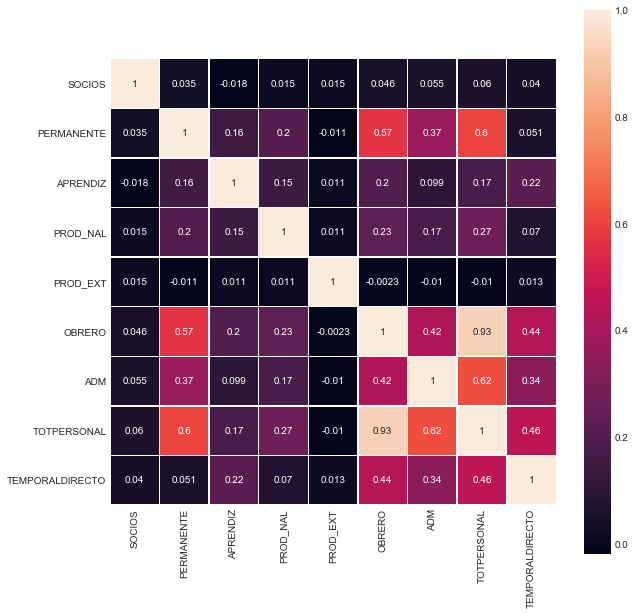

In [47]:
#Otra forma de visualizar la Matriz de covarianzas #ESTA ES MÁS BONITA
plt.subplots(figsize=(10,10))
sns.heatmap(x.corr(), square=True, annot=True, linewidths =0.4)

4.Cálculo de los valores propios

In [45]:
#KAREN da el mismo resultado utilizando CorMat o utilizando x.corr
eigen_value, eigen_vector =np.linalg.eig(x.corr()) 
print("Valores propios \n  %s \n" %eigen_value)
print("Vectores propios \n %s" %eigen_vector)

Valores propios 
  [3.18799404 0.03756606 0.3489299  0.61284306 0.79841389 0.94940134
 1.04158591 1.0244435  0.9996966 ] 

Vectores propios 
 [[-4.63095560e-02 -3.69262300e-03 -7.89247851e-03  1.41422348e-02
   1.09341560e-01 -6.11035181e-01 -3.46448109e-01 -6.96228765e-01
  -8.65975759e-02]
 [-3.82531332e-01 -2.54750511e-02  6.62350890e-01 -2.18207230e-05
   4.40518142e-01  5.20582947e-02 -3.16252588e-01  2.30498548e-01
  -2.53772574e-01]
 [-1.76925463e-01  2.14549116e-02 -1.34470568e-01 -2.07387819e-01
   4.88564487e-01 -4.51425457e-01  6.63817475e-01  1.53854656e-01
  -1.84371606e-02]
 [-2.07111855e-01 -2.58951744e-02  6.27580553e-02  7.34449667e-02
  -6.35319831e-01 -4.42203336e-01  5.72312069e-02  3.34537347e-01
  -4.82426842e-01]
 [ 2.67836694e-03  4.46585039e-03 -6.35271713e-03 -2.04033731e-02
   3.33862796e-02  4.23647407e-01  3.40729300e-01 -4.48565574e-01
  -7.08249200e-01]
 [-5.00628091e-01 -6.22606297e-01 -4.01185220e-01  4.19582187e-01
   9.49985305e-02  1.06906093e-01 -5.

In [46]:
var=[(eigen_value[i]/10)*100 for i in range(len(eigen_value))]
var_cum=[]
for i in range(len(var)):
    var_cum.append(sum(var[:i+1]))
var_cum

[31.879940399352456,
 32.255601002515334,
 35.74490002547336,
 41.873330582017076,
 49.85746946237266,
 59.35148286934505,
 69.76734196901488,
 80.01177695053596,
 90.00874295706251]

Gráfico de la varianza asociada a cada factor. Se utiliza para determinar cuántos factores deben retenerse. Típicamente el gráfico muestra la clara ruptura entre la pronunciada pendiente de los factores más importantes. 

http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/AMult/tema3am.pdf

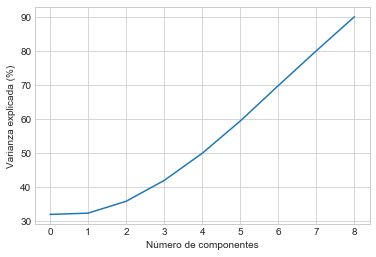

In [48]:
#El nuúmero de componentes esta determinado por el punto donde se encuentra una clara ruptura o punto de inflexión

plt.plot(var_cum,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.show()

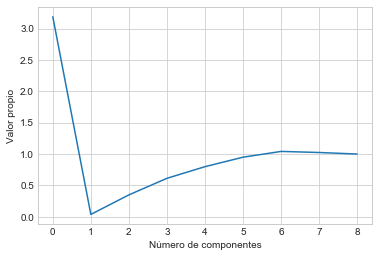

In [49]:
plt.plot(eigen_value,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Valor propio")
plt.show()

Analizando la gráfica Valor propio vs Número de componentes se muestra que los valores propios comienzan a formar una línea recta después del (primero, segundo o sexto componente principal #NO ESTOY SEGURA). Sin embargo, teniendo en cuenta que el primer componente sólo explica el 31,89% de la información se considera tomar las primeras seis componentes cuya varianza explicada es del 59,35%

5.Proyección de los datos

In [ ]:
#Creo que no se pueden proyectar los datos

for name in ('11002090', '1657388', '8600884'):
    plt.scatter(x=Y[y==name,0],y=Y[y==name,1],VENTAS=name)
plt.legend()
plt.show()

In [51]:
M_w=eigen_vector[:,0:6]
Y=X_std.dot(M_w) # Nuevos Y

# PCA

In [52]:
from sklearn.decomposition import PCA

sklearn_PCA= PCA(n_components=6)
Y_1=sklearn_PCA.fit_transform(X_std)

In [57]:
PCArecursosh = pd.DataFrame(data = Y_1, columns = ['Componente principal 1', 'Componente principal 2','Componente principal 3', 'Componente principal 4','Componente principal 5', 'Componente principal 6'])
PCArecursosh.head(10295)

,Componente principal 1,Componente principal 2,Componente principal 3,Componente principal 4,Componente principal 5,Componente principal 6
0,-1.185089,-0.695942,-0.637784,0.736318,-0.068403,0.572833
1,-0.725312,-0.382473,-0.774458,-0.156469,1.243354,-0.380629
2,-0.449776,0.091581,-0.206241,0.258389,-0.293520,1.425957
3,-0.481104,-0.877073,0.919950,0.696528,-1.466840,0.668562
...,...,...,...,...,...,...
10291,0.198137,1.136218,-0.613714,-0.518668,0.457986,-0.410604
10292,-0.305868,1.438557,0.275241,-0.766234,-0.311770,-0.531725
10293,7.496782,-4.366122,-1.954654,3.038521,0.246866,-0.019317
10294,-1.291353,0.227193,1.392686,-0.312268,-1.331324,-1.219472


In [56]:
establecimiento=total[['ESTABLECIMIENTO']].head(10295)
establecimiento

,ESTABLECIMIENTO
0,145898
1,145904
2,145912
3,145913
...,...
11635,987459
11636,987465
11637,987467
11638,987483


In [61]:
PCArecursosh.reset_index(drop=True, inplace=True) 
establecimiento.reset_index(drop=True, inplace=True) 
PCA = pd.concat([establecimiento,PCArecursosh], axis=1)
PCA

,ESTABLECIMIENTO,Componente principal 1,Componente principal 2,Componente principal 3,Componente principal 4,Componente principal 5,Componente principal 6
0,145898,-1.185089,-0.695942,-0.637784,0.736318,-0.068403,0.572833
1,145904,-0.725312,-0.382473,-0.774458,-0.156469,1.243354,-0.380629
2,145912,-0.449776,0.091581,-0.206241,0.258389,-0.293520,1.425957
3,145913,-0.481104,-0.877073,0.919950,0.696528,-1.466840,0.668562
...,...,...,...,...,...,...,...
10291,987459,0.198137,1.136218,-0.613714,-0.518668,0.457986,-0.410604
10292,987465,-0.305868,1.438557,0.275241,-0.766234,-0.311770,-0.531725
10293,987467,7.496782,-4.366122,-1.954654,3.038521,0.246866,-0.019317
10294,987483,-1.291353,0.227193,1.392686,-0.312268,-1.331324,-1.219472


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


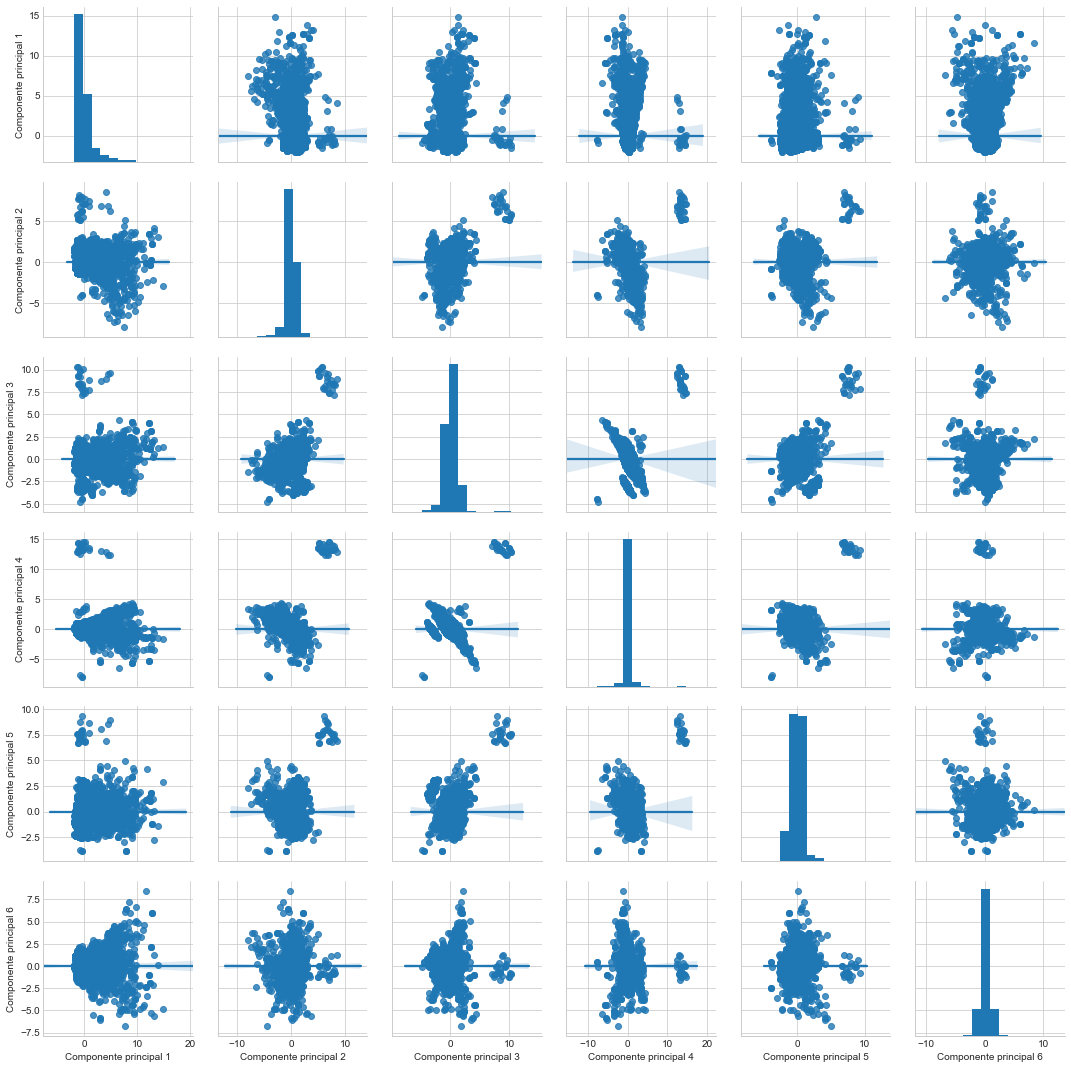

In [67]:
b = sns.pairplot(PCA, vars=["Componente principal 1","Componente principal 2","Componente principal 3","Componente principal 4","Componente principal 5","Componente principal 6"],kind="reg") 
b # Resumen gráfico con histogramas y diagramas de dispersión de las variables